# Homework 2 - Approssimazione di dati e Ottimizzazione

## 2. Ottimizzazione con Discesa Gradiente
Utilizzando il metodo di Discesa del Gradiente (GD) visto a lezione, risolvere il problema di minimo:

$$
\min_{x \in \mathbb{R}^n} f(x),
$$

per le seguenti funzioni $f(x)$:

1. $f: \mathbb{R}^2 \to \mathbb{R}$ tale che:

   $$
   f(x_1, x_2) = (x_1 - 3)^2 + (x_2 - 1)^2,
   $$

   con soluzione esatta $x_{true} = (3, 1)$.

2. $f: \mathbb{R}^2 \to \mathbb{R}$ tale che:

   $$
   f(x_1, x_2) = 10(x_1 - 1)^2 + (x_2 - 2)^2,
   $$

   con soluzione esatta $x_{true} = (1, 2)$.

3. $f: \mathbb{R} \to \mathbb{R}$ tale che:

   $$
   f(x) = x^4 + x^3 - 2x^2 - 2x,
   $$

   con soluzione esatta $x_{true} = 0.92222$.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

def f1(x):
    return (x[0]-3)**2 + (x[1]-1)**2

def df1(x):
    return np.array([2*(x[0]-3), 2*(x[1]-1)])

def f2(x):
    return 10*((x[0]-1)**2) + (x[1]-2)**2

def df2(x):
    return np.array([20*(x[0]-1), 2*(x[1]-2)])

def f3(x):
    if np.any(np.abs(x) > 1e6):  # Evita overflow
        return np.inf
    return x**4 +x**3 - 2*(x**2) - 2*x

def df3(x):
    if np.any(np.abs(x) > 1e6):  # Evita overflow
        return np.array([np.inf])
    return 4*(x**3) + 3*(x**2) - 4*x - 2

x1_true = np.array([ 3.0, 1.0])
x2_true = np.array([1.0, 2.0])
x3_true = np.array([0.92222])


* Per ognuna delle funzioni sopra, utilizzare sia il metodo GD con passo fisso sia utilizzando backtracking, provando vari valori del passo $\alpha > 0$ nel caso in cui non si utilizzi backtracking. Utilizza `maxit` = 100, `tolf` = `tolx` = `1e-6`. Per le funzioni 1. e 2., scegliere `x0` come vettore di zeri. 

In [17]:
def GD(f, df, x0, x_true, alpha=0.1, maxit=100, tolf=1e-6, tolx=1e-6):
    k = 0
    rel_err = []
    obj_val = []
    grad_norm = []
    x = x0.copy()  
    path=[x.copy()]

    condizione = True
    while condizione:
        grad = df(x)
        x_new = x - alpha * grad 

        grad_norm.append(np.linalg.norm(grad))
        rel_err.append(np.linalg.norm(x_new - x_true) / np.linalg.norm(x_true))
        obj_val.append(f(x_new))
        path.append(x_new.copy())

        condizione=(k < maxit) and (np.linalg.norm(grad) > tolf) and (np.linalg.norm(x_new - x) > tolx)

        #if (np.linalg.norm(x - x0) < tolx):
        #    print(f"Algoritmo terminato per condizione su tolx")

        x = x_new
        k += 1

    return x, rel_err, obj_val, grad_norm, k, path

def backtracking(f, df, x, alpha=1.0, rho=0.5, c=1e-4):
    grad = df(x)
    while f(x - alpha * grad) > f(x) - c * alpha * np.linalg.norm(grad)**2:
        alpha *= rho
    return alpha

def GD_backtracking(f, df, x0, x_true, alpha=1.0, maxit=100, tolf=1e-6, tolx=1e-6):
    k = 0
    rel_err = []
    obj_val = []
    grad_norm = []

    x = x0.copy()
    path=[x.copy()]

    condizione = True

    while condizione:
        grad = df(x)
        alpha_k = backtracking(f, df, x, alpha)
        x_new = x - alpha_k * grad

        grad_norm.append(np.linalg.norm(grad))
        rel_err.append(np.linalg.norm(x_new - x_true) / np.linalg.norm(x_true))
        obj_val.append(f(x_new))
        path.append(x_new.copy())

        condizione = (k < maxit) and (np.linalg.norm(df(x)) > tolf) and (np.linalg.norm(x_new-x) > tolx)

        # Se l'algoritmo termina per || x_{k+1} - x_k || < tolx, stampare il warning
        #if (np.linalg.norm(x - x0) < tolx):
        #    print(f"Algoritmo terminato per condizione su tolx.")

        x = x_new
        k += 1

    return x, rel_err, obj_val, grad_norm, k, path


* Confrontare le soluzioni ottenute con e senza backtracking in termini di tempo di esecuzione e velocità di convergenza (misurata in termini di numero di iterazioni richieste per convergere).

* Visualizzare su un grafico il valore di $|| \nabla f(x_k) ||_2$ sia per la soluzione con backtracking sia per alcuni valori di $\alpha$, e commenta su quale metodo performa meglio e perché. La soluzione con backtracking è *sempre* più veloce di quella con passo fisso?

* Visualizzare su un grafico il valore dell'errore relativo $RE(x_{true}, x_k)$ sia per la soluzione con backtracking sia per alcuni valori di $\alpha$, e commenta i risultati ottenuti.

===FUNZIONE 1===
---alpha = 0.001---
Tempo GD = 0.003344 s
numero di iterazioni = 101
---alpha = 0.01---
Tempo GD = 0.001074 s
numero di iterazioni = 101
---alpha = 0.1---
Tempo GD = 0.000640 s
numero di iterazioni = 61

Tempo GD con Backtracking: 0.000263 s
numero di iterazioni = 2


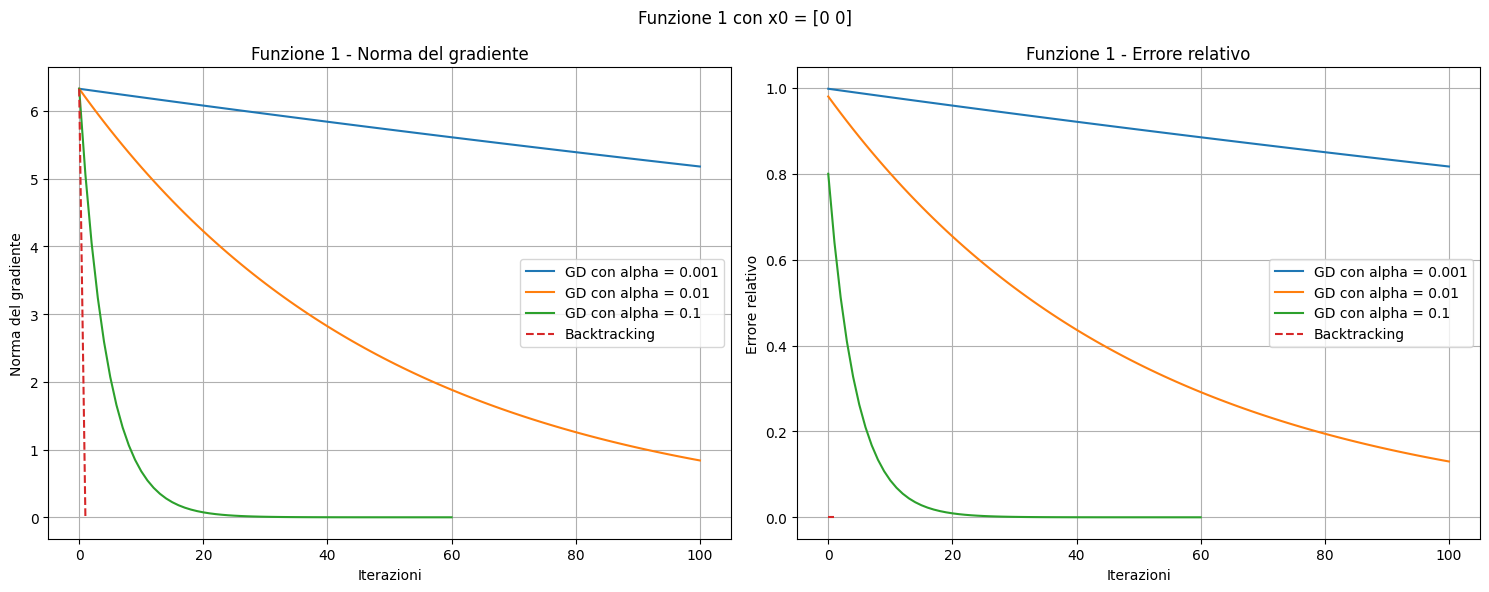

===FUNZIONE 2===
---alpha = 0.001---
Tempo GD = 0.001153 s
numero di iterazioni = 101
---alpha = 0.01---
Tempo GD = 0.000982 s
numero di iterazioni = 101
---alpha = 0.1---
Tempo GD = 0.001010 s
numero di iterazioni = 101

Tempo GD con Backtracking: 0.001411 s
numero di iterazioni = 55


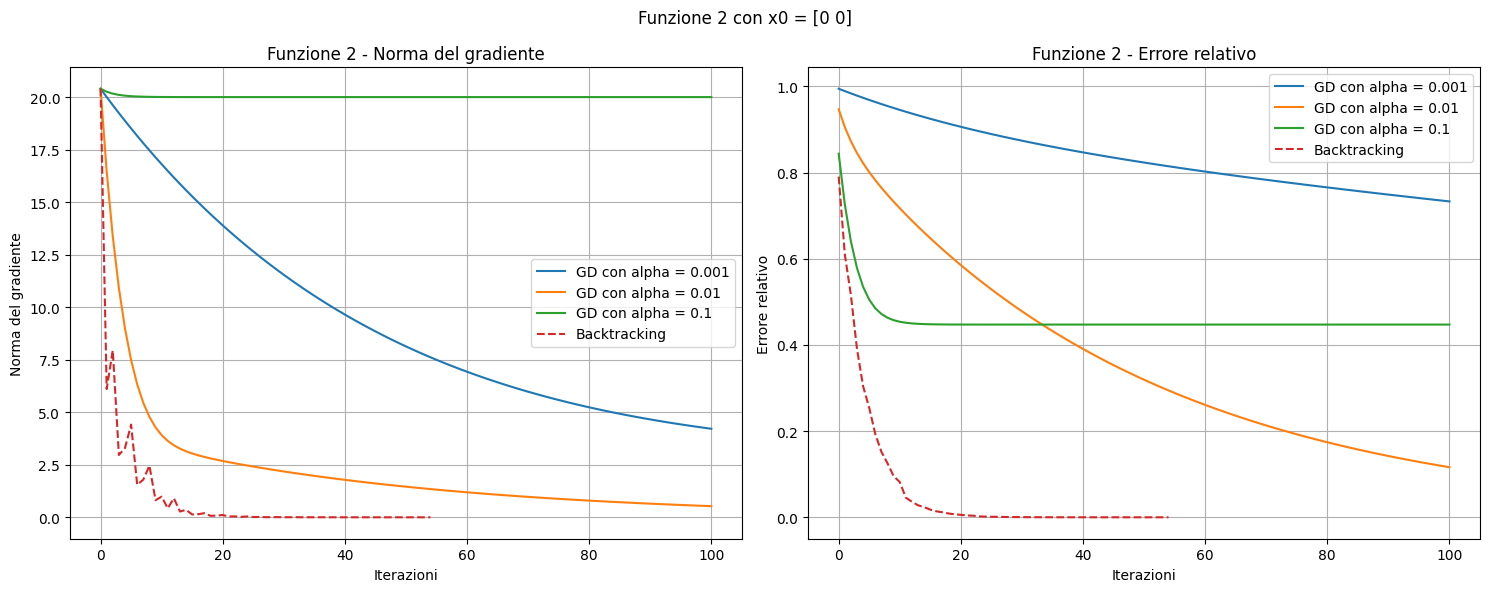

===FUNZIONE 3===
---alpha = 0.001---
Tempo GD = 0.002264 s
numero di iterazioni = 101
---alpha = 0.01---
Tempo GD = 0.002226 s
numero di iterazioni = 101
---alpha = 0.1---
Tempo GD = 0.000333 s
numero di iterazioni = 11

Tempo GD con Backtracking: 0.001934 s
numero di iterazioni = 18


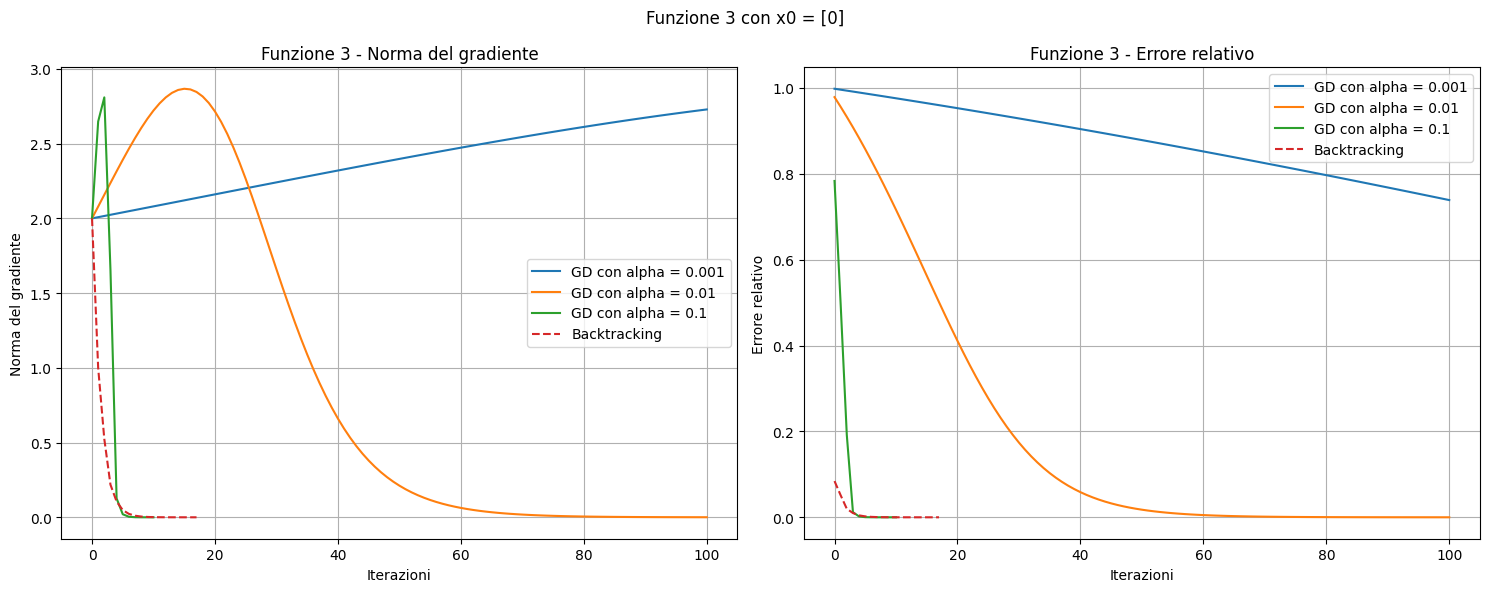

In [18]:
# Funzioni per plottare grfici
def plot_metrics(norm_gd, norm_bt, err_gd, err_bt, a, x0, title):
    plt.figure(figsize=(15,6))

    # Primo subplot: Norma del gradiente
    plt.subplot(1, 2, 1) 
    plt.title(f"{title} - Norma del gradiente")
    for alpha, data in zip(a, norm_gd):
        plt.plot(data, label=f"GD con alpha = {alpha}")
    plt.plot(norm_bt, label="Backtracking", linestyle="--")
    plt.xlabel("Iterazioni")
    plt.ylabel("Norma del gradiente")
    plt.legend()
    plt.grid()

    # Secondo subplot: Errore relativo
    plt.subplot(1, 2, 2)
    plt.title(f"{title} - Errore relativo")
    for alpha, data in zip(a, err_gd):
        plt.plot(data, label=f"GD con alpha = {alpha}")
    plt.plot(err_bt, label="Backtracking", linestyle="--")
    plt.xlabel("Iterazioni")
    plt.ylabel("Errore relativo")
    plt.legend()
    plt.grid()

    # Layout e visualizzazione
    plt.suptitle(f"{title} con x0 = {x0}")
    plt.tight_layout()
    plt.show()

a = [1e-3, 1e-2, 1e-1]

# Funzione 1

grad_norm_gd_list=[]
rel_err_gd_list=[]

print(f"===FUNZIONE 1===")
for alpha in a:
    start = time.time()
    sol, rel_err, obj_val, grad_norm, k ,path1 = GD(f1, df1, np.array([0, 0]), x1_true, alpha=alpha)
    end = time.time()
    grad_norm_gd_list.append(grad_norm)
    rel_err_gd_list.append(rel_err)
    print(f"---alpha = {alpha}---")
    print(f"Tempo GD = {end - start:.6f} s")
    print(f"numero di iterazioni = {k}")

start_bt = time.time()
sol_bt, rel_err_bt, obj_val_bt, grad_norm_bt, k_bt,path1_bt = GD_backtracking(f1, df1, np.array([0, 0]), x1_true, alpha=1)
end_bt = time.time()

print(f"\nTempo GD con Backtracking: {end_bt-start_bt:.6f} s")
print(f"numero di iterazioni = {k_bt}")
plot_metrics(grad_norm_gd_list, grad_norm_bt,rel_err_gd_list,rel_err_bt, a, np.array([0, 0]), "Funzione 1")
 

# Funzione 2

grad_norm_gd_list=[]
rel_err_gd_list=[]

print(f"===FUNZIONE 2===")
for alpha in a:
    start = time.time()
    sol, rel_err, obj_val, grad_norm, k,path2 = GD(f2, df2, np.array([0, 0]), x2_true, alpha=alpha, maxit=100, tolf=1e-6, tolx=1e-6)
    end = time.time()
    grad_norm_gd_list.append(grad_norm)
    rel_err_gd_list.append(rel_err)
    print(f"---alpha = {alpha}---")
    print(f"Tempo GD = {end - start:.6f} s")
    print(f"numero di iterazioni = {k}")

start_bt = time.time()
sol_bt, rel_err_bt, obj_val_bt, grad_norm_bt, k_bt,path2_bt = GD_backtracking(f2, df2, np.array([0, 0]) , x2_true, alpha=1.0, maxit=100, tolf=1e-6, tolx=1e-6)
end_bt = time.time()

print(f"\nTempo GD con Backtracking: {end_bt-start_bt:.6f} s")
print(f"numero di iterazioni = {k_bt}")
plot_metrics(grad_norm_gd_list, grad_norm_bt,rel_err_gd_list,rel_err_bt, a, np.array([0, 0]), "Funzione 2")

#Funzione 3
grad_norm_gd_list=[]
rel_err_gd_list=[]

#print(f"\nValore iniziale x0 = {x0}")
print(f"===FUNZIONE 3===")
for alpha in a:
    start = time.time()
    sol, rel_err, obj_val, grad_norm, k ,_= GD(f3, df3, np.array([0]), x3_true, alpha=alpha, maxit=100, tolf=1e-6, tolx=1e-6)
    end = time.time()
    grad_norm_gd_list.append(grad_norm)
    rel_err_gd_list.append(rel_err)
    print(f"---alpha = {alpha}---")
    print(f"Tempo GD = {end - start:.6f} s")
    print(f"numero di iterazioni = {k}")


start_bt = time.time()
sol_bt, rel_err_bt, obj_val_bt, grad_norm_bt, k_bt,_ = GD_backtracking(f3, df3, np.array([0]), x3_true, alpha=1.0, maxit=100, tolf=1e-6, tolx=1e-6)
end_bt = time.time()

print(f"\nTempo GD con Backtracking: {end_bt-start_bt:.6f} s")
print(f"numero di iterazioni = {k_bt}")
plot_metrics(grad_norm_gd_list,grad_norm_bt,rel_err_gd_list,rel_err_bt,a,np.array([0]),"Funzione 3")


* Fare un plot della funzione 3. nell'intervallo $[-3, 3]$, cosa osservi? Provare ad eseguire il metodo GD con e senza backtracking variando il valore di `x0`. Cosa osservi?

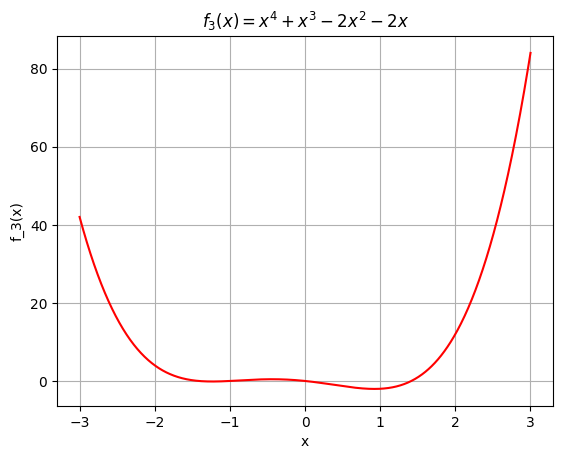

===[Valore iniziale -3]===
---alpha = 0.001---
Tempo GD = 0.002302 s
numero di iterazioni = 101
---alpha = 0.01---
Tempo GD = 0.002199 s
numero di iterazioni = 101
---alpha = 0.1---
Tempo GD = 0.000241 s
numero di iterazioni = 6

Tempo GD con Backtracking: 0.003091 s
numero di iterazioni = 37


===[Valore iniziale -1]===
---alpha = 0.001---
Tempo GD = 0.002614 s
numero di iterazioni = 101
---alpha = 0.01---
Tempo GD = 0.002581 s
numero di iterazioni = 101
---alpha = 0.1---
Tempo GD = 0.000443 s
numero di iterazioni = 13

Tempo GD con Backtracking: 0.002618 s
numero di iterazioni = 32


===[Valore iniziale 0]===
---alpha = 0.001---
Tempo GD = 0.002302 s
numero di iterazioni = 101
---alpha = 0.01---
Tempo GD = 0.002530 s
numero di iterazioni = 101
---alpha = 0.1---
Tempo GD = 0.000255 s
numero di iterazioni = 11

Tempo GD con Backtracking: 0.001704 s
numero di iterazioni = 18


===[Valore iniziale 1]===
---alpha = 0.001---
Tempo GD = 0.002172 s
numero di iterazioni = 101
---alpha = 0.01-

/var/folders/_l/jw_dj3nj5wvg6yrd5nm96cm80000gn/T/ipykernel_55999/821682349.py:19: RuntimeWarning: invalid value encountered in subtract
  condizione=(k < maxit) and (np.linalg.norm(grad) > tolf) and (np.linalg.norm(x_new - x) > tolx)


In [19]:
# Funzione 3
#plot della funzione
xx = np.linspace(-3, 3, 1000)
yy = f3(xx)
plt.plot(xx, yy, 'r')
plt.xlabel('x')
plt.ylabel('f_3(x)')
plt.title(r'$f_3(x) = x^4 + x^3 - 2x^2 - 2x$')
plt.grid()
plt.show()


x0_val = [-3,-1, 0, 1,2, 3]

for x0 in x0_val:
    #Funzione 3
    grad_norm_gd_list=[]
    rel_err_gd_list=[]

    print(f"===[Valore iniziale {x0}]===")
    for alpha in a:
        start = time.time()
        sol, rel_err, obj_val, grad_norm, k ,_= GD(f3, df3, np.array([x0]), x3_true, alpha=alpha, maxit=100, tolf=1e-6, tolx=1e-6)
        end = time.time()
        grad_norm_gd_list.append(grad_norm)
        rel_err_gd_list.append(rel_err)
        print(f"---alpha = {alpha}---")
        print(f"Tempo GD = {end - start:.6f} s")
        print(f"numero di iterazioni = {k}")

    start_bt = time.time()
    sol_bt, rel_err_bt, obj_val_bt, grad_norm_bt, k_bt,_ = GD_backtracking(f3, df3, np.array([x0]), x3_true, alpha=1.0, maxit=100, tolf=1e-6, tolx=1e-6)
    end_bt = time.time()

    print(f"\nTempo GD con Backtracking: {end_bt-start_bt:.6f} s")
    print(f"numero di iterazioni = {k_bt}\n\n")
    #plot_metrics(grad_norm_gd_list,grad_norm_bt,rel_err_gd_list,rel_err_bt,a,np.array([0]),"Funzione 3")



* *Opzionale (Diffile)*: Fare un contour plot delle funzioni 1. e 2. (vedi documentazione per `plt.contour`) e visualizza, sullo stesso grafico, il percorso generato dall'algoritmo GD. In particolare, rappresentare sul grafico bi-dimensionale la posizione di tutti gli iterati $x_k$  dell'algoritmo GD, collegati da un segmento, così da controllare il diverso comportamento di GD quando si utilizza o meno il backtracking. 

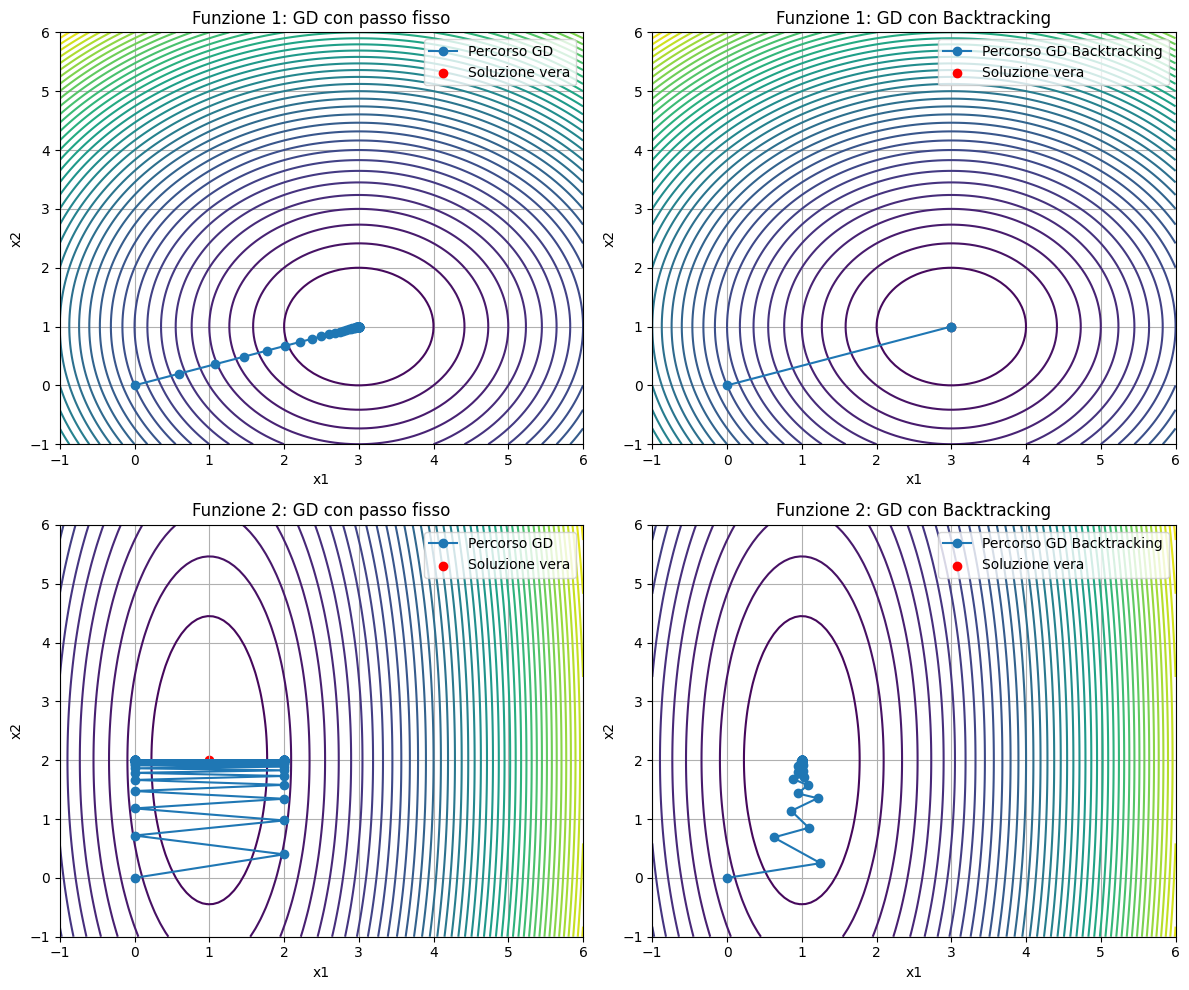

In [20]:
x1_true = np.array([3.0, 1.0])
x2_true = np.array([1.0, 2.0])

# Genera griglia per i contour plot
x1 = np.linspace(-1, 6, 100)
x2 = np.linspace(-1, 6, 100)
#X1, X2 = x1.flatten(), x2.flatten
X1, X2 = np.meshgrid(x1, x2)

plt.figure(figsize=(12,10))

#Funzione 1 senza backtracking
plt.subplot(2,2,1)
Z1 = f1([X1, X2])
path1 = np.array(path1)  
plt.contour(X1, X2, Z1, levels=50, cmap="viridis")
plt.plot(path1[:, 0], path1[:, 1], marker='o', label="Percorso GD")
plt.scatter(x1_true[0], x1_true[1], color='red', label="Soluzione vera")
plt.title("Funzione 1: GD con passo fisso")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()

# Funzione 2 senza backtracking
plt.subplot(2,2,3)
Z2 = f2([X1, X2])
path2 = np.array(path2) 
plt.contour(X1, X2, Z2, levels=50, cmap="viridis")
plt.plot(path2[:, 0], path2[:, 1], marker='o', label="Percorso GD")
plt.scatter(x2_true[0], x2_true[1], color='red', label="Soluzione vera")
plt.title("Funzione 2: GD con passo fisso")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()

# Funzione 1 con backtracking
plt.subplot(2,2,2)
path1_bt = np.array(path1_bt)
plt.contour(X1, X2, Z1, levels=50, cmap="viridis")
plt.plot(path1_bt[:, 0], path1_bt[:, 1], marker='o', label="Percorso GD Backtracking")
plt.scatter(x1_true[0], x1_true[1], color='red', label="Soluzione vera")
plt.title("Funzione 1: GD con Backtracking")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()

# Funzione 2 con backtracking
plt.subplot(2,2,4)
path2_bt = np.array(path2_bt) # Conversione coerente
plt.contour(X1, X2, Z2, levels=50, cmap="viridis")
plt.plot(path2_bt[:, 0], path2_bt[:, 1], marker='o', label="Percorso GD Backtracking")
plt.scatter(x2_true[0], x2_true[1], color='red', label="Soluzione vera")
plt.title("Funzione 2: GD con Backtracking")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
